# Introduction
The idea of this notebook is to explore a step-by-step approach to create a <b>Linear Classifier with Softmax</b> without the help of any third party library. We will later compare its results with two other supervised learning algorithms such as Neural Networks and K-Nearest Neighbors in order to see if there's any difference in performance and accuracy.

In practice, these Algorithms should be useful enough for us to classify our data whenever we have already made clusters (in this case color) which will serve as a starting point to train our models.

## 1. Working Data

In [3]:
# Load Data
SampleData <- read.csv("sample.csv")
SampleData$Class <- as.character(SampleData$Class)

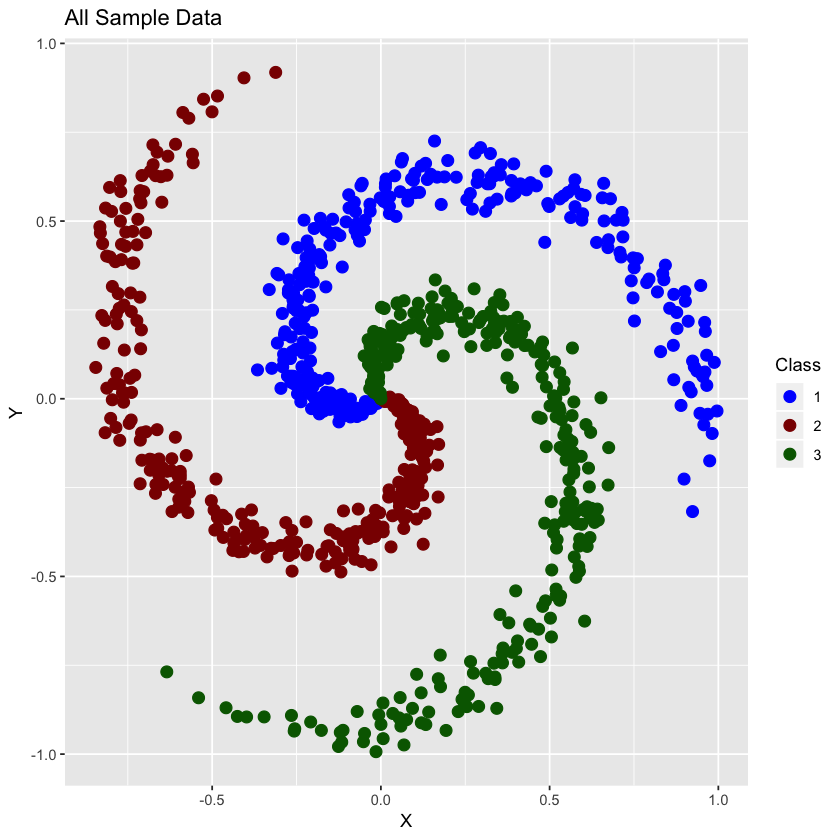

In [4]:
# Display all data
library(ggplot2)
colsdot <- c("1" = "blue", "2" = "darkred", "3" = "darkgreen")
ggplot() + 
  geom_point(data=SampleData,mapping=aes(x,y, colour=Class),size=3 ) +  
  scale_color_manual(values=colsdot) +
  xlab('X') + ylab('Y') + ggtitle('All Sample Data')

As we can observe, our data has 900 points distributed in the complex form of a spiral and it's classified in 3 clusters (Red, Green and Blue) en equal amounts (300 per class).

### 1.1 Train and test sample generation

We will create 2 different sample sets:
- <b>Training Set:</b> This will contain 75% of our working data, selected randomly. This set will be used to train our model.
- <b>Test Set:</b> Remaining 25% of our working data, which will be used to test the accuracy of our model. In other words, once our predictions of this 25% are made, will check the "<i>percentage of correct classifications</i>" by comparing predictions versus real values.

In [5]:
# Training Dataset
smp_siz = floor(0.75*nrow(SampleData))
train_ind = sample(seq_len(nrow(SampleData)),size = smp_siz)
train =SampleData[train_ind,]

# Test Dataset
test=SampleData[-train_ind,]
OriginalTest <- test
paste("Training and test sets done")

[1] "Training and test sets done"

### 1.2 Train Data
With this data we will generate train our models. This corresponds to 75% of our data.

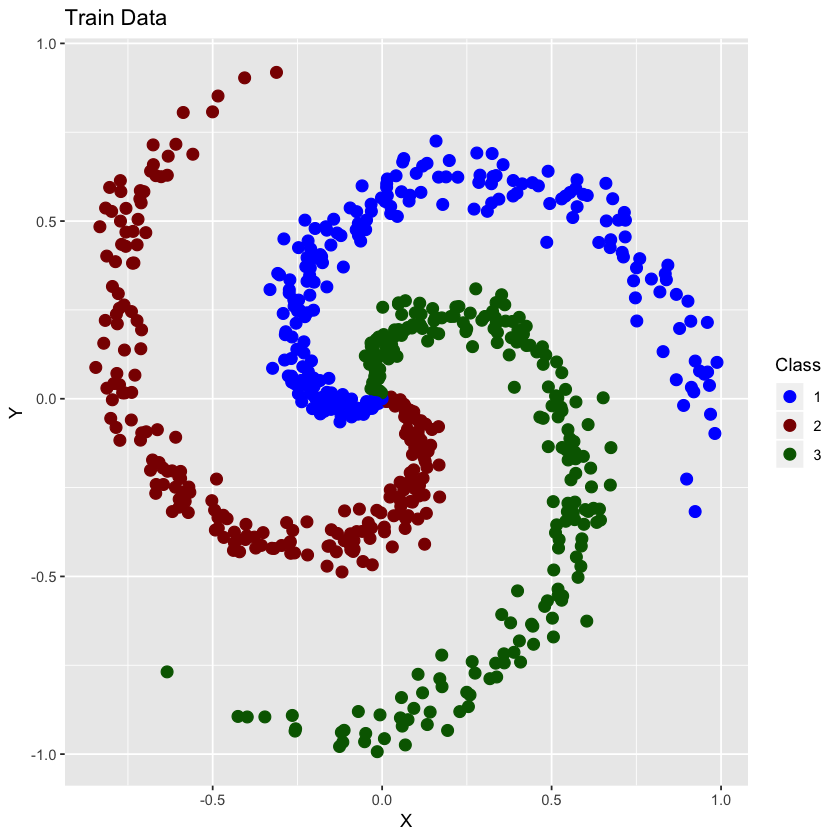

In [6]:
# Display data
library(ggplot2)
colsdot <- c("1" = "blue", "2" = "darkred", "3" = "darkgreen")
ggplot() + 
  geom_point(data=train,mapping=aes(x,y, colour=Class),size=3 ) +  
  scale_color_manual(values=colsdot) +
  xlab('X') + ylab('Y') + ggtitle('Train Data')

By comparing to the "all sample data" plot we can now observe much fewer points. These points will be used to train our algorithms into learning our training data classifications (RGB colors) as shown below.

### 1.3 Test Data
This corresponds to leftover (25%) data. Even though in this scenario we already know it's classification, we will simulate a more realistic case in which we don't, in order to "predict" it's colors.

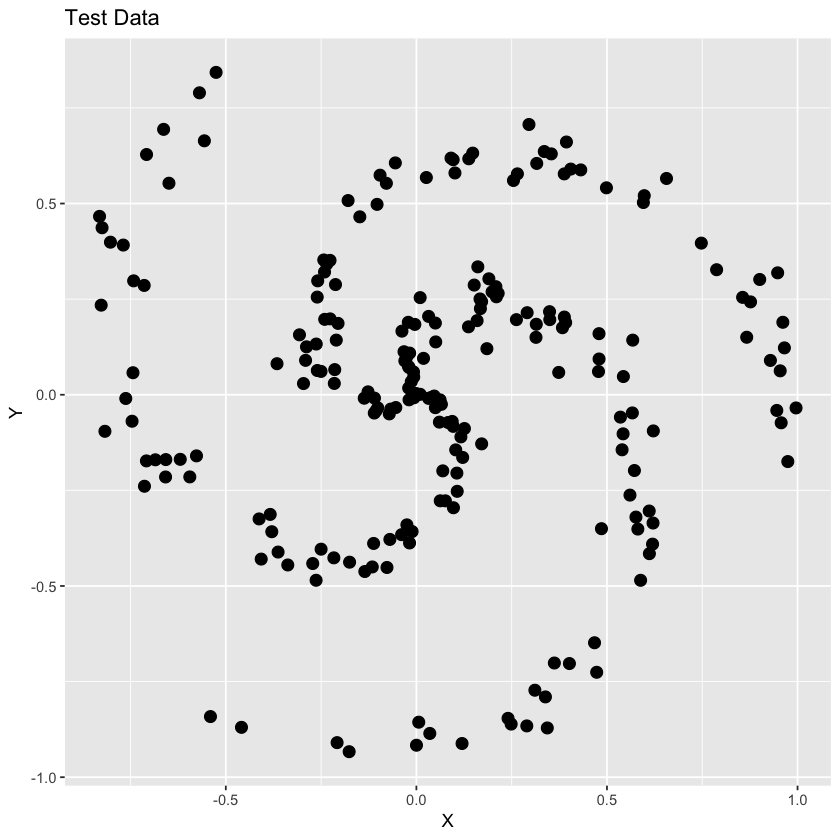

In [7]:
# Display data
library(ggplot2)
ggplot() + 
  geom_point(data=test,mapping=aes(x,y),size=3 ) +  
  scale_color_manual(values=colsdot) +
  xlab('X') + ylab('Y') + ggtitle('Test Data')

As seen in the plot above we now have many points missing since this only represents 25% of our training data. Additionally, our spiral is not very clear now and colors are completely gone. <b>We will try to predict these colors</b> by creating different algorithms which we will later compare in order to observe its accuracy.

## 2. Linear Classifier with Softmax

Below is a step-by-step example of a Linear Classifier with Softmax cost function.
What we want to achieve is for each selected gray point above (our test values), where we allegedly don't know it's true color, find the correct classification by finding the correct linear combination of characteristics in a very similar way on how we usually generate our lineal models.

<img src="images/formula.png" width="192" height="36" />

Note that our Weight (W) and Bias (b) are both Vectors, which dimensions of 2x3 and 1x3 respectively.

<b>Aditionally, we need to define: </b>
- <b>Score Function: </b> Our linear classifier.
- <b>Cost Function: </b> In this case we will use Softmax since it provides an intuitive output in the form of a normalized class probability. We will use cross-entropy loss.
- <b>Optimization Method</b>: We will use gradient descent in order to minimize our cost function.

### 2.1 Features and Parameter Initialization

In [25]:
# We define features
X <- data.frame(A=train$x,B=train$y)
y <- data.frame(y=train$Class)

# Variables: Number Classes, Dimensions and Scores per Class
K <- nrow(unique(y))
D <- ncol(X)
N <- nrow(X)/K

# One-hot encoding of Classes
Y <- matrix(0, nrow(y), K)
for (i in 1:(nrow(y))){
  Y[i, as.numeric(y[i,])] <- 1
}

# Initialize parameters
W <- 0.01 * matrix(rnorm(D*K), nrow = D)
b <- matrix(0, nrow = 1, ncol = K)

### 2.2 Parameter Calculation using Gradient Descent

<b>Original Parameters</b>

In [9]:
cat("Weights (W)")
W
cat("Bias (b)")
b

Weights (W)

-0.000887354,-0.01179301,0.01075175
0.030165826,0.01289714,0.01425497


Bias (b)

0,0,0


<b>New (learned) Parameters:</b>

In [10]:
# Gradient Descent
LearningRate <- 1
reg = 0.0001
for (i in 1:30000) {
  
  # We calculate Scores and Probs
  scores <- as.matrix(X) %*% W + matrix(rep(b,N*K), nrow = N*K, byrow = T)
  exp_scores <- exp(scores)
  probs <- exp_scores / rowSums(exp_scores)
  
  # compute the loss: sofmax and regularization
  corect_logprobs <- -log(probs)
  data_loss <- sum(corect_logprobs*Y)/nrow(X)
  reg_loss <- 0.5*reg*sum(W*W) 
  loss <- data_loss + reg_loss
  
  if(i %% 10000==0) {
    # Print on the screen some message
    cat(paste0("Iteration ", i,": ",loss,"\n"))
  }
  
  # Gradients
  dscores <- (probs-Y)/nrow(X)
  dW <- t(X)%*%dscores
  db <- colSums(dscores)
  
  dW = dW + reg*W # regularization gradient
  
  W <- W - dW*LearningRate
  b <- b - db*LearningRate
  
  
}
cat("\n\nNew Weights (W)")
W
cat("New Bias (b)")
b

Iteration 10000: 0.712708830430841
Iteration 20000: 0.712708824015345
Iteration 30000: 0.712708823147189


New Weights (W)

A,1.162896,-3.356003,2.193011
B,3.084107,-1.401465,-1.679788


New Bias (b)

-0.05522137,0.008968574,0.0462528


### 2.3 Evaluation

<b>2.3.1 Real Classification Example</b>

Let's calculate the Class probability of a random number from the Dataset, such as the point number 356.

In [11]:
SampleData[356,]

,x,y,Class
,<dbl>,<dbl>,<chr>
356,0.16634,-0.0785322,2


As observed, we already know the correct class is 2 (Red).

<b>2.3.2 Predicted Classification Example</b>

Lets see if our classifier works as expected. For this we need to remember the formula:

<img src="images/formula.png" width="192" height="36" />

<img src="images/example.png?3" width="660" height="448" />

In [12]:
sample_score <- c(SampleData[356,]$x,SampleData[356,]$y) %*% W + b
exponencial_score <- exp(sample_score)
probabilities <- exponencial_score / rowSums(exponencial_score)
probabilities

0.2758717,0.1972978,0.5268305


As seen above, we calculate a 96% chance of this data point being red, which is <b>correct</b>.

<b>2.3.3 Another Example</b>

Let's try with another random number, such as data point number 471

In [13]:
sample_score <- c(SampleData[471,]$x,SampleData[471,]$y) %*% W + b
exponencial_score <- exp(sample_score)
probabilities <- exponencial_score / rowSums(exponencial_score)
probabilities

0.02338154,0.8959146,0.08070383


As observed our model predicts it to be Blue with 66% probability. But as seen below, it's true color is green (Class 3) which the model assigned only 23% chance.

In [14]:
SampleData[471,]

,x,y,Class
,<dbl>,<dbl>,<chr>
471,-0.4574366,-0.3376602,2


### 2.4 Accuracy

First, we need to generate our classification function.
This will allow us to evaluate every single data point within our training data set.

In [15]:
# Classification
Color <- function(X,W,b,K) {
  N <- nrow(X)
  scores <- as.matrix(X) %*% W + matrix(rep(b,N), nrow = N, byrow = T)
  exp_scores <- exp(scores)
  probs <- exp_scores / rowSums(exp_scores)
  Class <- apply(probs, 1, which.max)
  Class <- data.frame(prob=Class)
  return(Class$prob)
}

In [16]:
# Predict Train Data
Real <- data.frame(Real=y$y)
Real$Prediction <- Color(X,W,b,K)
Real$Match <- ifelse(Real$Real == Real$Prediction, 1, 0)
Accuracy <- round(sum(Real$Match)/nrow(Real),4)
print(paste("Accuracy of ",Accuracy*100,"%",sep=""))

[1] "Accuracy of 55.56%"


Even though our data point Nº356 was correctly classified, it seems that this model performs correctly only <b>56% of the times</b> on our train sample. Note that even though this might seem low, in fact, is a significal increase from random chance where we would expect only <b>33% accuracy</b>.

### 2.5 Predicting our Test Sample

[1] "Accuracy of 49.78%"


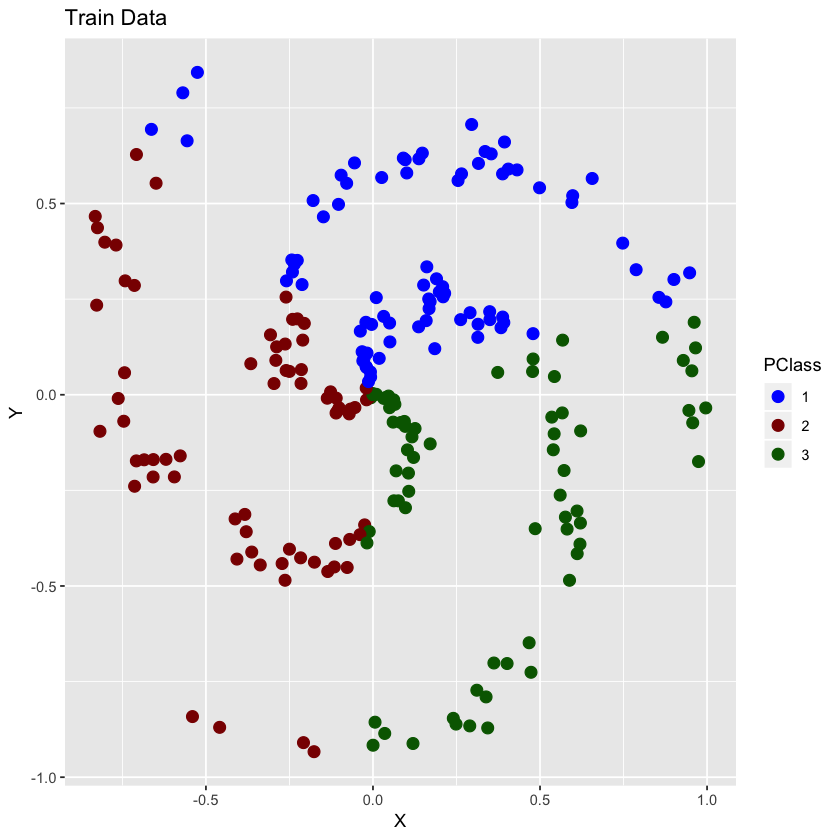

In [17]:
# Predict Test Data
Real <- data.frame(Real=test$Class)
Real$Prediction <- Color(test[,1:2],W,b,K)
Real$Match <- ifelse(Real$Real == Real$Prediction, 1, 0)
Accuracy <- round(sum(Real$Match)/nrow(Real),4)
print(paste("Accuracy of ",Accuracy*100,"%",sep=""))

# Display data
colsdot <- c("1" = "blue", "2" = "darkred", "3" = "darkgreen")
PClass <- as.character(Real$Prediction)
ggplot() + 
  geom_point(data=test,mapping=aes(x,y, colour=PClass),size=3 ) +  
  scale_color_manual(values=colsdot) +
  xlab('X') + ylab('Y') + ggtitle('Train Data')

We now have a higher <b>out-of-sample accuracy of 49%</b>, which proves this model performs well on new data. Having said so, even though our model somehow understood our shape, it seems it's having troubles with some parts of it. Can you guess why is this happening?

### 2.5 Decision Limits

Is clear in the prediction plot above that our model somewhat understood our shape, but not quite. To further explore this, we will try to map our decision limits which should shed some light into how our model classifies this two dimensional space.

In simple words, we will simulate 160.000 data points (400x400 matrix) within the range of our original dataset, which when later plotted, will fill most of the empty spaces with colors. This will help us express in detail how our model would classify this 2D space within it's learnt Color classes. The more points we generate, the better our "resolution" will be, much like pixels on a TV.

Running Time: 1.23 Seconds

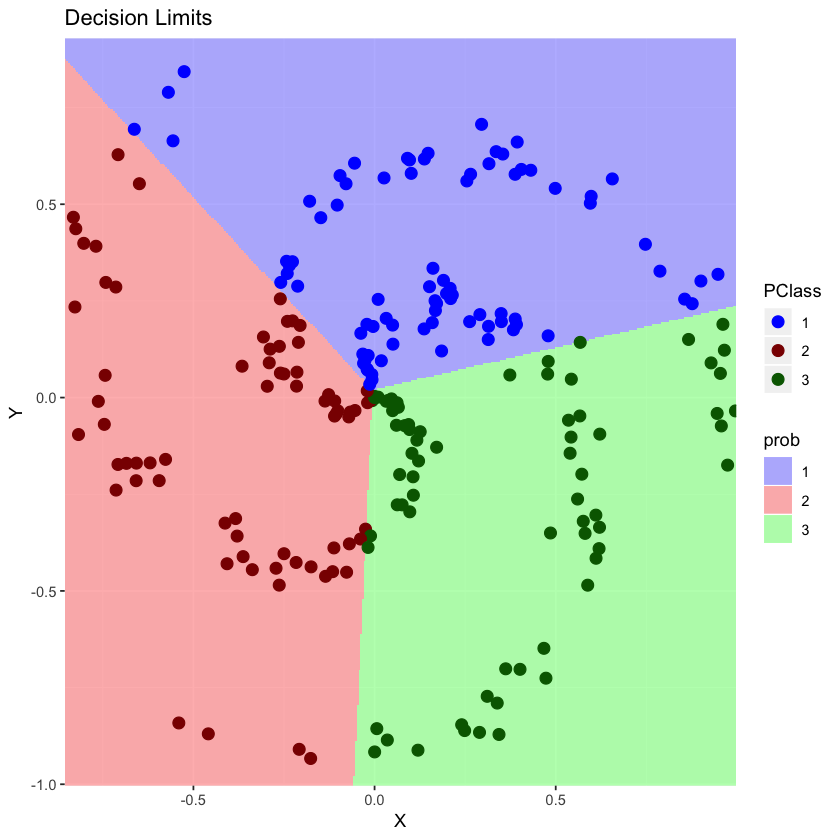

In [18]:
# We calculate background colors
x_coord = seq(min(X[,1]) - 0.008,max(X[,1]) + 0.008,length.out = 400)
y_coord = seq(min(X[,2]) - 0.008,max(X[,2]) + 0.008, length.out = 400)
coord = expand.grid(x = x_coord, y = y_coord)
coord[['prob']] = Color(coord,W,b,K)
coord$prob <- as.character(coord$prob)


# We calculate predictions and plot decition area
start_time <- Sys.time()
colsdot <- c("1" = "blue", "2" = "darkred", "3" = "darkgreen")
colsfill <- c("1" = "#aaaaff", "2" = "#ffaaaa", "3" = "#aaffaa")
ggplot() + 
  geom_tile(data=coord,mapping=aes(x, y, fill=prob), alpha=0.8) +
  geom_point(data=test,mapping=aes(x,y, colour=PClass),size=3 ) + 
  scale_color_manual(values=colsdot) +
  scale_fill_manual(values=colsfill) +
  xlab('X') + ylab('Y') + ggtitle('Decision Limits')+
  scale_x_continuous(expand=c(0,0))+scale_y_continuous(expand=c(0,0))
end_time <- Sys.time()
RunningTime <- end_time - start_time
cat(paste("Running Time:",round(RunningTime,2),"Seconds"))

It's now clear how our model classified our data points.<br>
It did so by finding a linear combination which separated our points into the 3 classes (Red, Green and Blue). Each linear combination was carefully selected (trough gradient descent optimization) in order to minimize wrong classifications (our cost function), which ended up being the shape shown above.

As expected, we can observe that this model is able to only predict data that's linearly separable. In other words, it's unable to correctly predict non-linear shapes such as this one.

## 3. K-Nearest Neighbors Algorithm

Below is an example of a custom application of this algorithm to this scenario.
You can check my <a href="https://juan-cristobal-andrews.github.io/K-Nearest-Neighbors-Algorithm-From-Scratch/" target="_blank">K-Nearest Neighbors Algorithm Notebook</a> for a more in-depth / step-by-step approach.

### 3.1 Algorithm

In [19]:
# We define a function for prediction
KnnL2Prediction <- function(x,y,K) {
    
  # Train data
  Train <- train
  # This matrix will contain all X,Y values that we want test.
  Test <- data.frame(X=x,Y=y)
    
  # Data normalization
  Test$X <- (Test$X - min(Train$x))/(min(Train$y) - max(Train$x))
  Test$Y <- (Test$Y - min(Train$y))/(min(Train$y) - max(Train$y))
  Train$x <- (Train$x - min(Train$x))/(min(Train$x) - max(Train$x))
  Train$y <- (Train$y - min(Train$y))/(min(Train$y) - max(Train$y))

  # We will calculate L1 and L2 distances between Test and Train values.
  VarNum <- ncol(Train)-1
  L1 <- 0
  L2 <- 0
  for (i in 1:VarNum) {
    L1 <- L1 + (Train[,i] - Test[,i])
    L2 <- L2 + (Train[,i] - Test[,i])^2
  }
    
  # We will use L2 Distance
  L2 <- sqrt(L2)
  
  # We add labels to distances and sort
  Result <- data.frame(Label=Train$Class,L1=L1,L2=L2)
  
  # We sort data based on score
  ResultL1 <-Result[order(Result$L1),]
  ResultL2 <-Result[order(Result$L2),]
  
  # Return Table of Possible classifications
  a <- prop.table(table(head(ResultL2$Label,K)))
  b <- as.data.frame(a)
  return(as.character(b$Var1[b$Freq == max(b$Freq)]))
}
print("Function loaded")

[1] "Function loaded"


### 3.1 Accuracy

In [20]:
# Predictions over our Test sample
K <- 1
test$Prediction <- mapply(KnnL2Prediction, test$x, test$y,K)

# We calculate accuracy on test data
test$Match <- ifelse(test$Class == test$Prediction, 1, 0)
Accuracy <- round(sum(test$Match)/nrow(test),4)
print(paste("Accuracy of ",Accuracy*100,"%",sep=""))

[1] "Accuracy of 94.22%"


Note that our model has now 94% out-of-sample accuracy, which is great.

### 3.2 Decision Limits

Just like before, we will map our decision limit 400x400 datapoint map.
This should take some time, since K-Nearest Neighbors Algorithm needs to compare each of those 160.000 points with every single datapoint in our training dataset.

Running Time: 4.38 Minutes

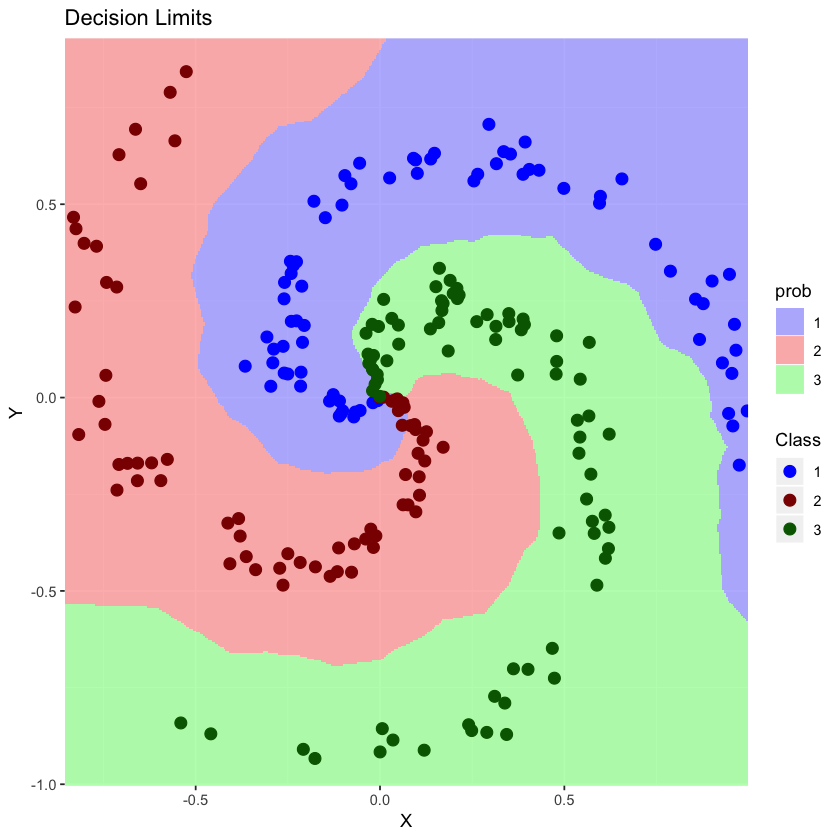

In [21]:
start_time <- Sys.time()
# We calculate background colors
x_coord = seq(min(X[,1]) - 0.008,max(X[,1]) + 0.008,length.out = 400)
y_coord = seq(min(X[,2]) - 0.008,max(X[,2]) + 0.008, length.out = 400)
coord = expand.grid(x = x_coord, y = y_coord)
coord[['prob']] = mapply(KnnL2Prediction, coord$x, coord$y,K)

# We calculate predictions and plot decition area
colsdot <- c("1" = "blue", "2" = "darkred", "3" = "darkgreen")
colsfill <- c("1" = "#aaaaff", "2" = "#ffaaaa", "3" = "#aaffaa")
ggplot() + 
  geom_tile(data=coord,mapping=aes(x, y, fill=prob), alpha=0.8) +
  geom_point(data=test,mapping=aes(x,y, colour=Class),size=3 ) + 
  scale_color_manual(values=colsdot) +
  scale_fill_manual(values=colsfill) +
  xlab('X') + ylab('Y') + ggtitle('Decision Limits')+
  scale_x_continuous(expand=c(0,0))+scale_y_continuous(expand=c(0,0))
end_time <- Sys.time()
RunningTime <- end_time - start_time
cat(paste("Running Time:",round(RunningTime,2),"Minutes"))

As seen by the decision limits above, it seems our new model is having a very difficult time classifying center data points, which is expected since they are all in fact near neighbors. Additionally, it took 4.38 minutes to run, which is 200 times longer than Linear Classification algorithm.

## 4. Neural Networks

We will generate a 100 neuron single layer neural network with Softmax output layer for classification.
You can check my <a href="https://juan-cristobal-andrews.github.io/Simple-Neural-Network-From-Scratch/" target="_blank">Simple Regression Neural Network Notebook</a> for a more in-depth / step-by-step approach on these types of algorithms.

### 4.1 Features and Parameter Initialization

In [26]:
# Initialize parameters
h = 100
W <- 0.01 * matrix(rnorm(ncol(X)*h), nrow = ncol(X), ncol=h)
b <- matrix(0, nrow = 1, ncol = h)
W2 <- 0.01 * matrix(rnorm(K*h), nrow = h, ncol=K)
b2 <- matrix(0, nrow = 1, ncol = K)

W <- as.matrix(W)
W2 <- as.matrix(W2)

Y <- matrix(0, nrow(y), K)
  for (i in 1:(nrow(y))){
  Y[i, as.numeric(y[i,])] <- 1
}

### 4.2 Algorithm

In [27]:
# Gradient Descent
LearningRate <- 1
reg = 0.001
for (i in 1:9000) {
  
  # We calculate Scores and Probs
  hidden_layer <- pmax(as.matrix(X) %*% W + matrix(rep(b,nrow(X)), nrow = nrow(X), byrow = T),0)
  scores = hidden_layer %*% W2 + matrix(rep(b2,nrow(X)), nrow = nrow(X), byrow = T)
  exp_scores <- exp(scores)
  probs <- exp_scores / rowSums(exp_scores)
  
  # compute the loss: sofmax and regularization
  corect_logprobs <- -log(probs)
  data_loss <- sum(corect_logprobs*Y)/nrow(X)
  reg_loss <- 0.5*reg*sum(W*W) + 0.5*reg*sum(W2*W2)
  loss <- data_loss + reg_loss

  if(i %% 1000==0) {
    # Print on the screen some message
    cat(paste0("Iteration: ", i, " loss ",loss,"\n"))
  }
  
  # Gradients
  dscores <- (probs-Y)/nrow(X)
  dW2 <- t(hidden_layer)%*%dscores
  db2 <- colSums(dscores)
  
  dHidden <- dscores %*% t(W2)
  dHidden[hidden_layer <= 0 ] <- 0
  
  # finally into W,b
  dW = t(X)%*%dHidden
  db =  colSums(dHidden)
  
  dW2 = dW2 + reg*W2 # regularization gradient
  dW = dW + reg*W # regularization gradient

  
  W2 <- W2 - dW2*LearningRate
  b2 <- b2 - db2*LearningRate
  W <- W - dW*LearningRate
  b <- b - db*LearningRate
  
  
}

Iteration: 1000 loss 0.372197584695255
Iteration: 2000 loss 0.27089888948307
Iteration: 3000 loss 0.250790721560352
Iteration: 4000 loss 0.242970879137973
Iteration: 5000 loss 0.241164744977069
Iteration: 6000 loss 0.240762711904905
Iteration: 7000 loss 0.24054993013934
Iteration: 8000 loss 0.240332207480218
Iteration: 9000 loss 0.240098825790129


### 4.3 Accuracy

In [38]:
# Classification
Color <- function(X,W,b,K,W2,b2) {

  # We calculate Scores and Probs
  hidden_layer <- pmax(as.matrix(X) %*% W + matrix(rep(b,nrow(X)), nrow = nrow(X), byrow = T),0)
  scores = hidden_layer %*% W2 + matrix(rep(b2,nrow(X)), nrow = nrow(X), byrow = T)
  exp_scores <- exp(scores)
  probs <- exp_scores / rowSums(exp_scores)
  
  # Compute class
  Class <- apply(probs, 1, which.max)
  Class <- data.frame(prob=Class)
  return(Class$prob)
  
}

In [39]:
# We calcuylate accuracy
Real <- data.frame(Real=y$y)
Real$Prediction <- Color(X,W,b,K,W2,b2)
Real$Match <- ifelse(Real$Real == Real$Prediction, 1, 0)
Accuracy <- round(sum(Real$Match)/nrow(Real),4)
print(paste("Accuracy of ",Accuracy*100,"%",sep=""))

[1] "Accuracy of 99.11%"


### 4.4 Decision Limits

Running Time: 0.83 Seconds

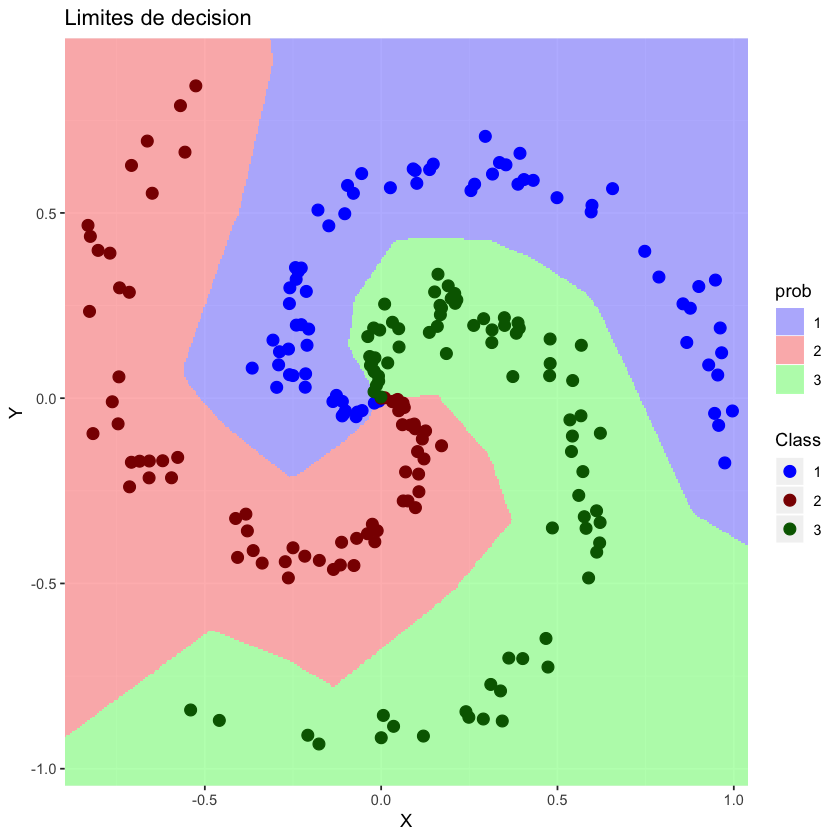

In [33]:
# We calculate background colors
x_coord = seq(min(X[,1]) - 0.05,max(X[,1]) + 0.05,length.out = 400)
y_coord = seq(min(X[,2]) - 0.05,max(X[,2]) + 0.05, length.out = 400)
coord = expand.grid(x = x_coord, y = y_coord)
coord[['prob']] = Color(coord,W,b,K,W2,b2)
coord$prob <- as.character(coord$prob)

start_time <- Sys.time()
colsdot <- c("1" = "blue", "2" = "darkred", "3" = "darkgreen")
colsfill <- c("1" = "#aaaaff", "2" = "#ffaaaa", "3" = "#aaffaa")
ggplot() + 
  geom_tile(data=coord,mapping=aes(x, y, fill=prob), alpha=0.8) +
  geom_point(data=test,mapping=aes(x,y, colour=Class),size=3 ) + 
  scale_color_manual(values=colsdot) +
  scale_fill_manual(values=colsfill) +
  xlab('X') + ylab('Y') + ggtitle('Limites de decision')+
  scale_x_continuous(expand=c(0,0))+scale_y_continuous(expand=c(0,0))
end_time <- Sys.time()
RunningTime <- end_time - start_time
cat(paste("Running Time:",round(RunningTime,2),"Seconds"))

This algorithm had the best performance in terms of accuracy and running time. As observed, it's able to better understand the spiral shape of the point distribution in the plot which is represented by more clear limits and good classification of central data points.

## 5. Final Thoughts
So far we've seen that our 3 algorithms performed better than random classification. It's clear that each algorithm has their own advangantes and their usage will vary depending on the dataset and resource constraints.

In particular, we can observe that K-Nearest Neighbors seems it's simple enough and doesn't require training, though, it needs to run against the whole dataset each time we classify a single datapoint, having impacts in scalability and performance. In contrast, both Neural Network and Linear Classifiers train a model which takes some initial time, but the later execution of the model runs

It seems that for this type of scenarios we should expect better results from Neural Networks, since Linear Classifiers fall short with non-linear functions such as this spiral and K-Nearest Neighbors has some trouble with non sparse data, which could lead to worst approximations on a higher dimension dataset.